<a href="https://colab.research.google.com/github/NikSh1891/Data_Analyst_Portfolio/blob/main/Superstore_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ishanshrivastava28/superstore-sales/download?datasetVersionNumber=1")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nshishkin
Your Kaggle Key: ··········


100%|██████████| 1.80M/1.80M [00:00<00:00, 3.21MB/s]


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
df = pd.read_csv("/content/superstore-sales/Superstore.csv", encoding='unicode_escape')

In [5]:
df.sample(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
8849,8850,CA-2012-140718,02-07-2012,04-07-2012,First Class,FA-14230,Frank Atkinson,Corporate,United States,Raleigh,...,27604,South,FUR-FU-10000076,Furniture,Furnishings,24-Hour Round Wall Clock,159.840,10,0.2,45.9540
4664,4665,CA-2013-116232,23-09-2013,27-09-2013,Standard Class,AC-10450,Amy Cox,Consumer,United States,Pembroke Pines,...,33024,South,OFF-BI-10004022,Office Supplies,Binders,Acco Suede Grain Vinyl Round Ring Binder,7.506,9,0.7,-6.0048


### Преварительный анализ и предобработка данных

In [6]:
# Приведем к общему виду наименования столбцов
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('-', '_')
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [7]:
print("Размер датасета: ")
print(df.shape, '\n')

print("Типы данных в столбцах: ")
print(df.dtypes, '\n')

print("Кол-во пропущенных значений: ")
print(df.isnull().sum(), '\n')

Размер датасета: 
(9994, 21) 

Типы данных в столбцах: 
row_id             int64
order_id          object
order_date        object
ship_date         object
ship_mode         object
customer_id       object
customer_name     object
segment           object
country           object
city              object
state             object
postal_code        int64
region            object
product_id        object
category          object
sub_category      object
product_name      object
sales            float64
quantity           int64
discount         float64
profit           float64
dtype: object 

Кол-во пропущенных значений: 
row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount    

In [8]:
# Удалим дубликаты при их наличии
df = df.drop_duplicates()
print(df.shape)

(9994, 21)


In [9]:
# Преобразуем данные с датой в соответствующий тип
df['order_date'] = pd.to_datetime(df['order_date'], format="%d-%m-%Y")
df['ship_date'] = pd.to_datetime(df['ship_date'], format="%d-%m-%Y")

In [10]:
# Удалим ненужные столбцы
df = df.drop(['customer_name', 'country', 'postal_code', 'row_id'], axis=1)

#### Выбросы

In [11]:
# Рассмотрим общие статистики количественных признаков
df[['sales', 'quantity', 'discount', 'profit']].describe().T

,count,mean,std,min,25%,50%,75%,max
sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


<Axes: >

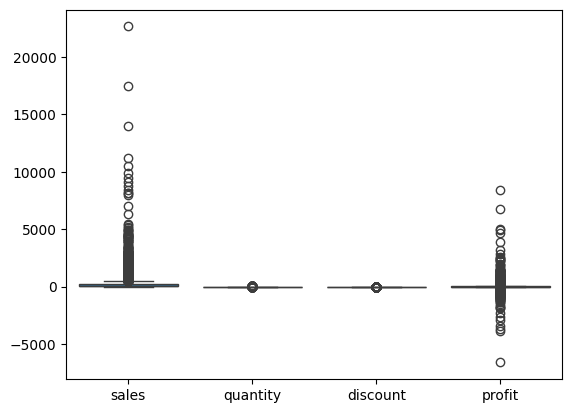

In [12]:
# Визуализация общих статистик количественных признаков
sns.boxplot(df[['sales', 'quantity', 'discount', 'profit']])

### Анализ категориальных признаков

#### Визуализация распределения категориальных признаков в разрезе кол-ва заказов

Office Supplies    6026
Furniture          2121
Technology         1847
Name: category, dtype: int64 



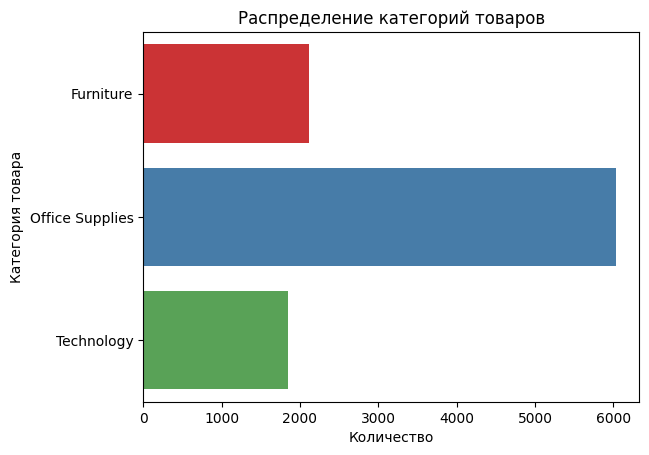

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: sub_category, dtype: int64 



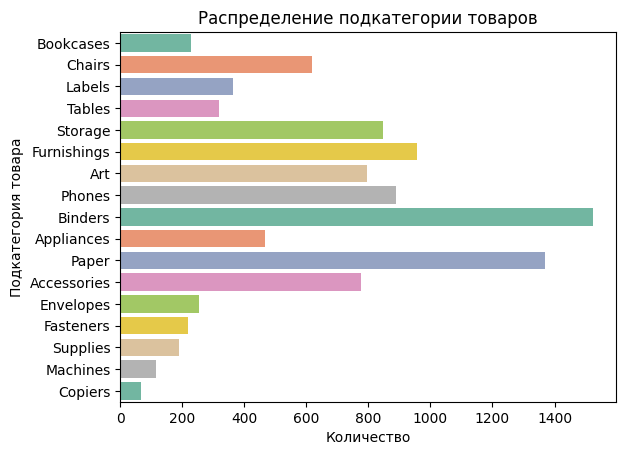

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

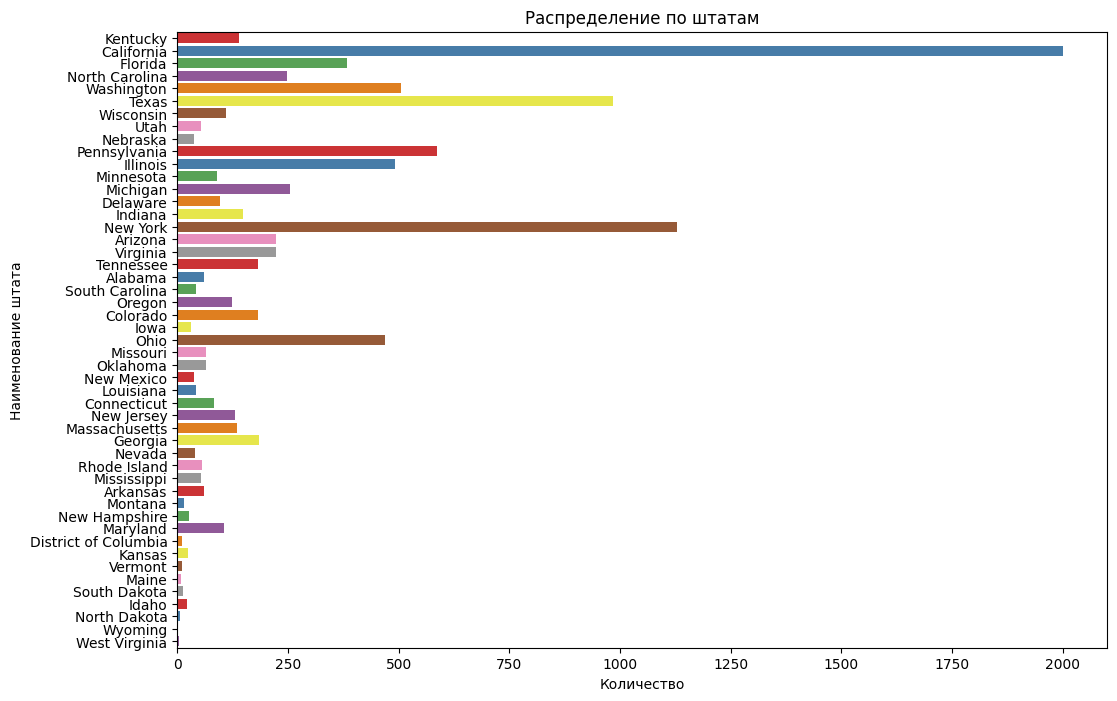

West       3203
East       2848
Central    2323
South      1620
Name: region, dtype: int64 



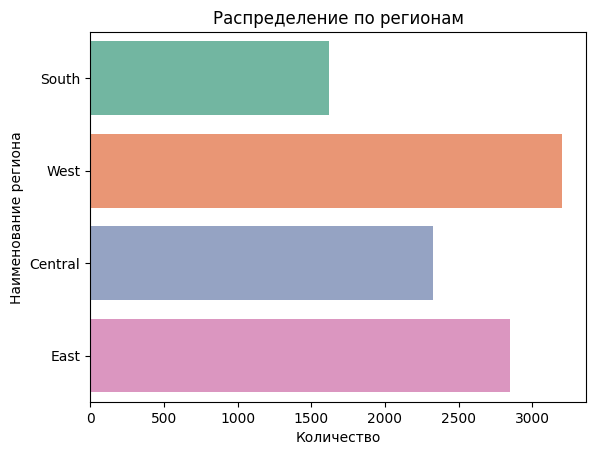

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: ship_mode, dtype: int64 



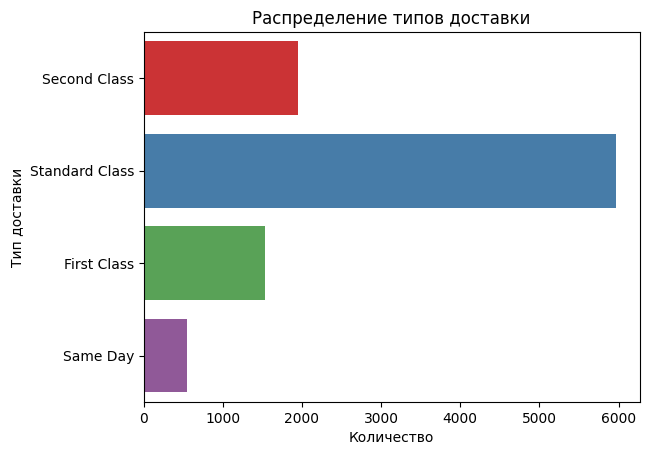

Consumer       5191
Corporate      3020
Home Office    1783
Name: segment, dtype: int64 



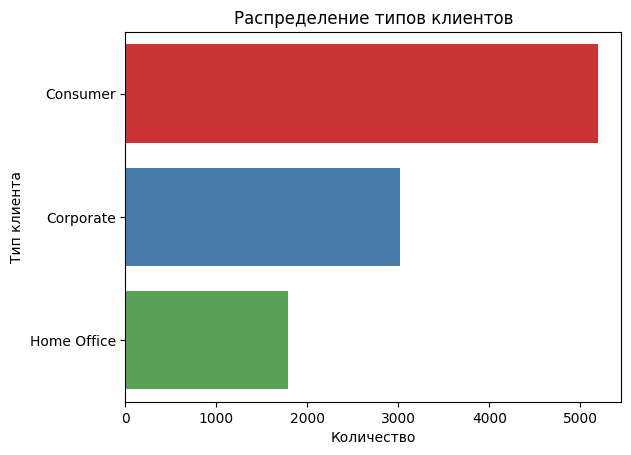

Кол-во городов в которые отгружались заказы:  531 

Кол-во уникальных наименований товаров:  1841 



In [13]:
# Визуализация распределения категориальных признаков
print(df.category.value_counts(), '\n')
sns.countplot(df, y='category', palette='Set1')
plt.title('Распределение категорий товаров')
plt.ylabel('Категория товара')
plt.xlabel('Количество')
plt.show()

print(df.sub_category.value_counts(), '\n')
sns.countplot(df, y='sub_category', palette='Set2')
plt.title('Распределение подкатегории товаров')
plt.ylabel('Подкатегория товара')
plt.xlabel('Количество')
plt.show()

print(df.state.value_counts(), '\n')
plt.figure(figsize=(12, 8))
sns.countplot(df, y='state', palette='Set1')
plt.title('Распределение по штатам')
plt.ylabel('Наименование штата')
plt.xlabel('Количество')
plt.show()

print(df.region.value_counts(), '\n')
sns.countplot(df, y='region', palette='Set2')
plt.title('Распределение по регионам')
plt.ylabel('Наименование региона')
plt.xlabel('Количество')
plt.show()

print(df.ship_mode.value_counts(), '\n')
sns.countplot(df, y='ship_mode', palette='Set1')
plt.title('Распределение типов доставки')
plt.ylabel('Тип доставки')
plt.xlabel('Количество')
plt.show()

print(df.segment.value_counts(), '\n')
sns.countplot(df, y='segment', palette='Set1')
plt.title('Распределение типов клиентов')
plt.ylabel('Тип клиента')
plt.xlabel('Количество')
plt.show()

print('Кол-во городов в которые отгружались заказы: ', df.city.nunique(), '\n')

print('Кол-во уникальных наименований товаров: ', df.product_name.nunique(), '\n')

In [14]:
df.sample()

,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
8781,CA-2012-133585,2012-03-01,2012-03-04,First Class,CM-12715,Corporate,Houston,Texas,Central,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",1227.9984,6,0.32,-36.1176


### Анализ временных рядов

In [15]:
# Добавим столбец со временем доставки в часах и столбец в датой заказа в формате год-месяц
df['ship_time'] = (df['ship_date'] - df['order_date']).dt.total_seconds() / 3600
df['order_year_month'] = df['order_date'].dt.strftime('%Y-%m')

In [16]:
df.sample()

,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,ship_time,order_year_month
2155,CA-2013-111115,2013-07-26,2013-07-28,Second Class,LB-16735,Consumer,Los Angeles,California,West,OFF-FA-10000624,Office Supplies,Fasteners,OIC Binder Clips,21.48,6,0.0,10.74,48.0,2013-07


Визуализируем изменение суммы покупок, прибыли, и кол-ва товара по месяцам

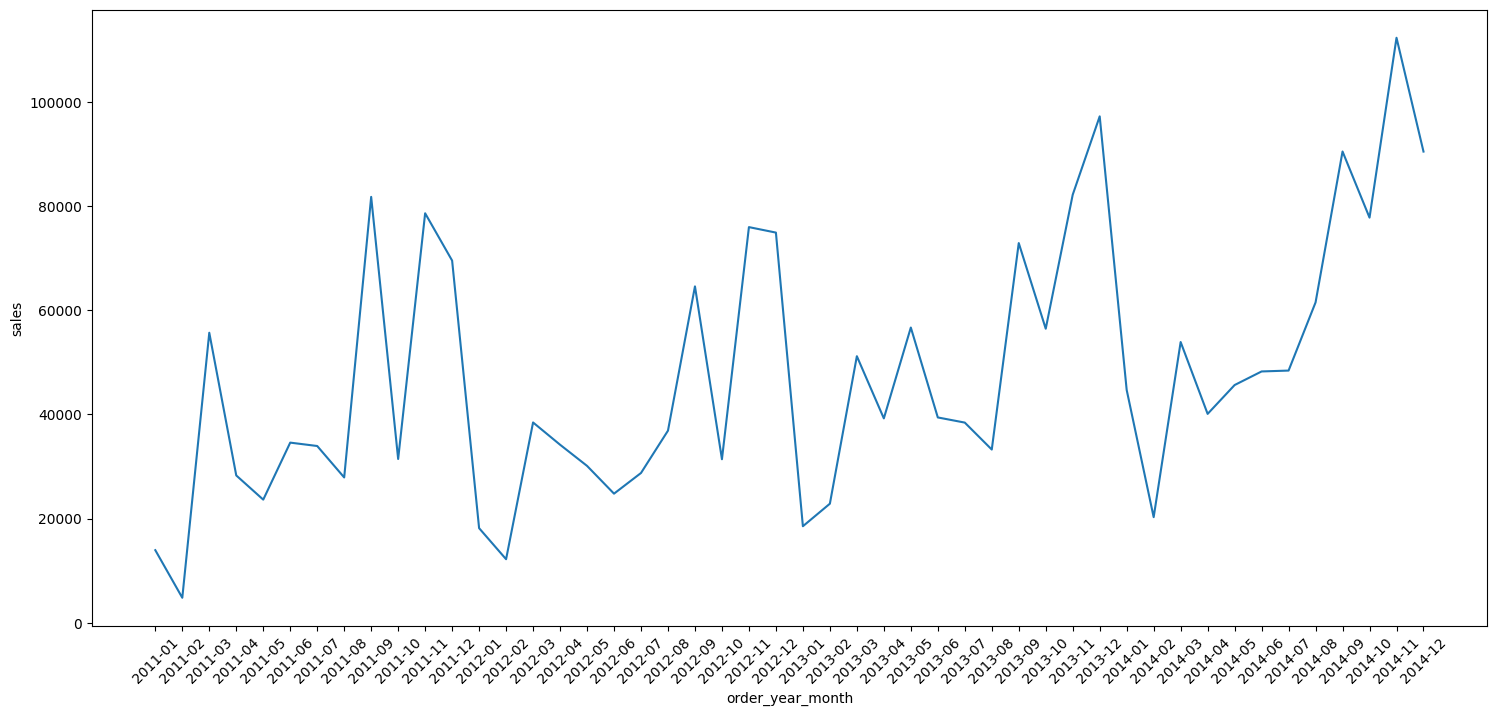

In [17]:
plt.figure(figsize=(18, 8))
sns.lineplot(df.groupby('order_year_month', as_index=False).agg({'sales': 'sum'}), x='order_year_month', y='sales')
plt.xticks(rotation=45)
plt.show()

- Судя по графику можно увидеть общий восходящий тренд по увеличению суммы покупок за месяц.
- Наблюдается сезонность которая выражается в падении суммы продаж в начале года(январь, февраль) и максимальных значениях август-сентябрь и последних месяцах года(ноябрь, декабрь).

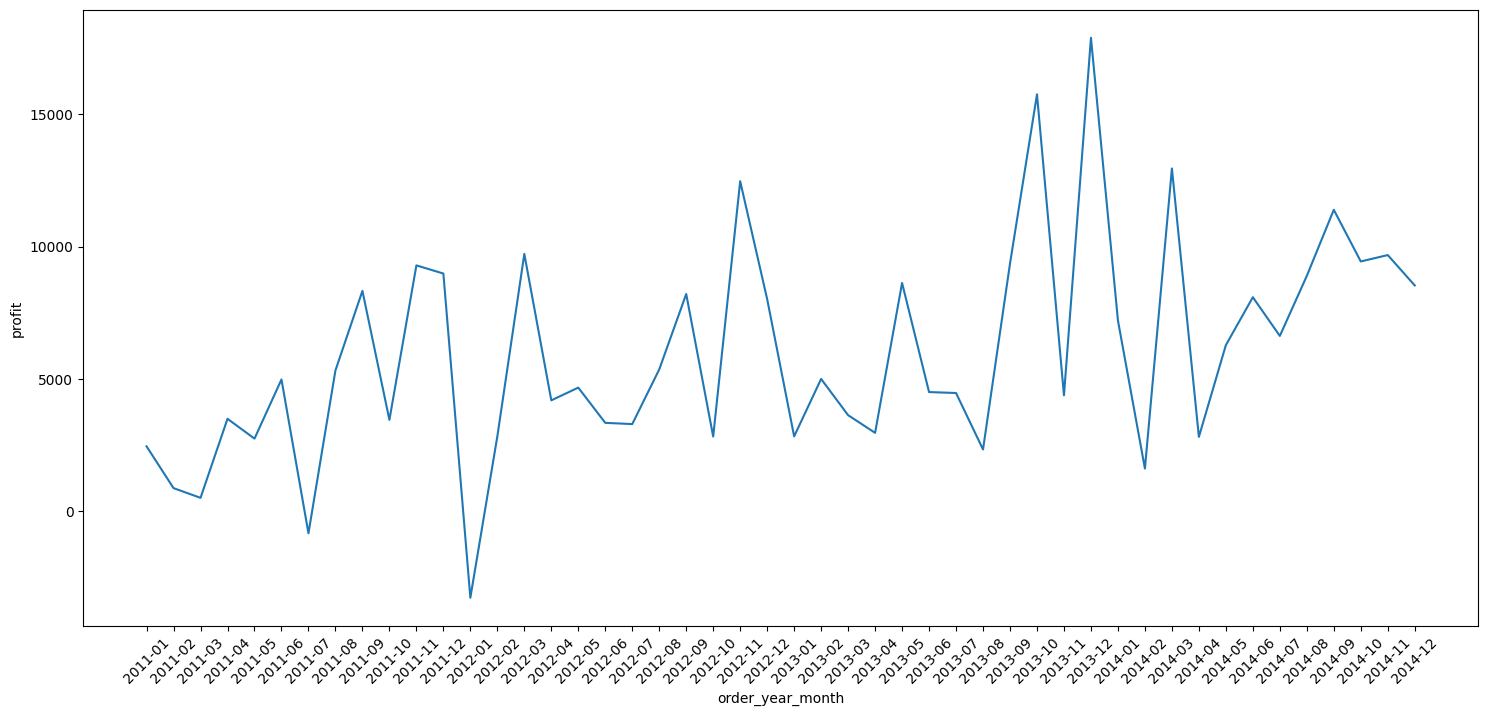

In [18]:
plt.figure(figsize=(18, 8))
sns.lineplot(df.groupby('order_year_month', as_index=False).agg({'profit': 'sum'}), x='order_year_month', y='profit')
plt.xticks(rotation=45)
plt.show()

- Наблюдается общий слабый восходящий тренд по увеличению прибыли.
- В признаке прибыль, не наблюдается сезонность.
- Наблюдаются отрицательные значения прибыли в июле 2011 и январе 2012.

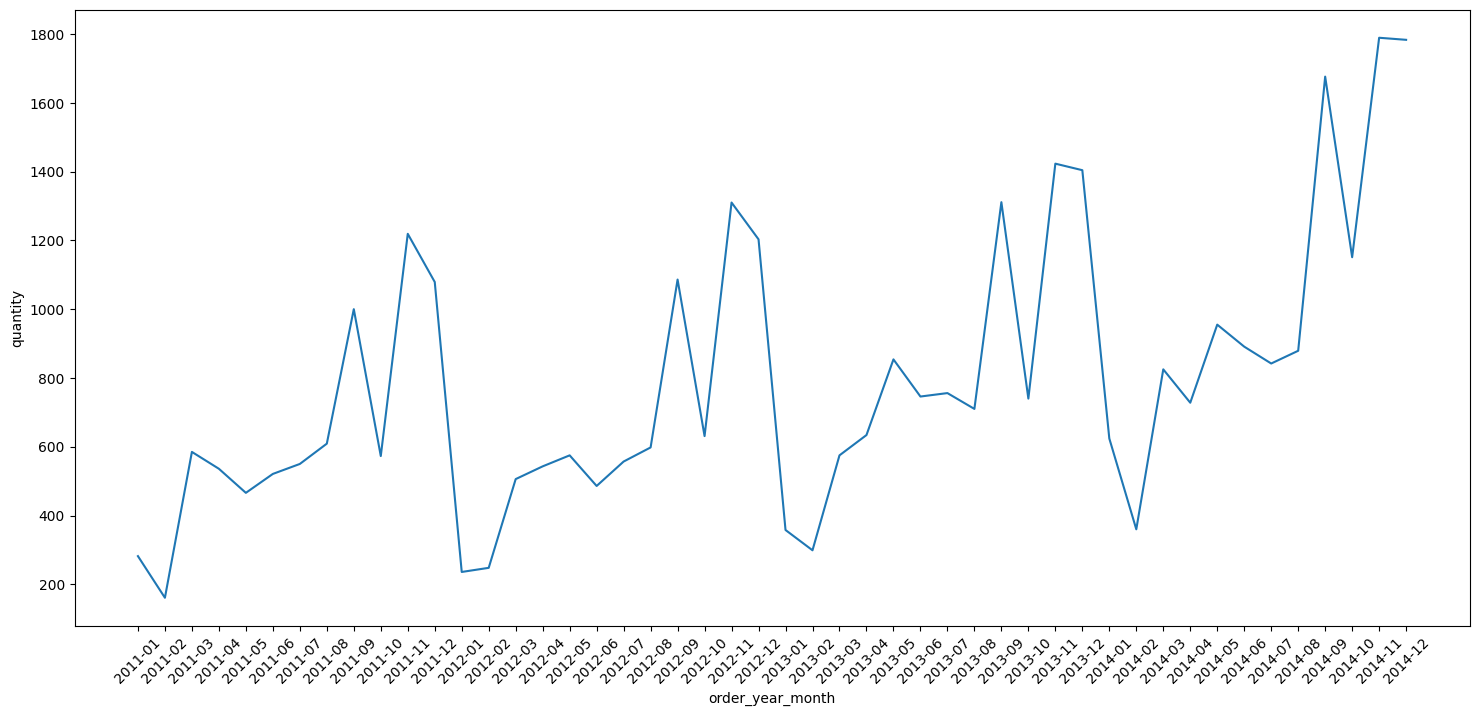

In [19]:
plt.figure(figsize=(18, 8))
sns.lineplot(df.groupby('order_year_month', as_index=False).agg({'quantity': 'sum'}), x='order_year_month', y='quantity')
plt.xticks(rotation=45)
plt.show()

- Наблюдается общий восходящий тренд по увеличению объема продаж.
- Сезонность соотносится с графиком суммы покупок.

In [20]:
# Среднее время доставки товара в разрезе типа доставки
df.groupby('ship_mode', as_index=False).agg({'ship_time': 'mean'}).sort_values('ship_time')

,ship_mode,ship_time
1,Same Day,1.060773
0,First Class,52.369311
2,Second Class,77.762468
3,Standard Class,120.172922


In [21]:
# Среднее время доставки в разрезе типа клиентов
df.groupby('segment', as_index=False).agg({'ship_time': 'mean'}).sort_values('ship_time')

,segment,ship_time
2,Home Office,94.128996
0,Consumer,94.617607
1,Corporate,96.214570


In [22]:
# Среднее время доставки в разрезе штата. ТОП-10 штатов.
df.groupby('state', as_index=False).agg({'ship_time': 'mean'}).sort_values('ship_time').head(10)

,state,ship_time
32,North Dakota,68.571429
46,West Virginia,72.000000
16,Louisiana,73.142857
37,Rhode Island,78.857143
33,Ohio,82.848614
25,Nebraska,84.000000
38,South Carolina,86.285714
5,Connecticut,86.341463
10,Idaho,88.000000
4,Colorado,88.351648


### Анализ суммы продаж и прибыли в разрезе типа клиентов

#### Анализ абсолютных показателей

In [23]:
df.groupby('segment', as_index=False).agg({'sales': 'sum', 'profit': 'sum'})

,segment,sales,profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


- Обычные клиенты лидируют по объему продаж и прибыли среди других типов клиентов

#### Анализ относительных показателей

In [24]:
df.groupby('segment', as_index=False).agg({'sales': 'mean', 'profit': 'mean'})

,segment,sales,profit
0,Consumer,223.733644,25.836873
1,Corporate,233.823300,30.456667
2,Home Office,240.972041,33.818664


Имеются различия в относительных показателях характеристик среди разных групп клиентов. Нужно провести проверку с помошью статистических тестов что бы убедиться в достоверности различий.

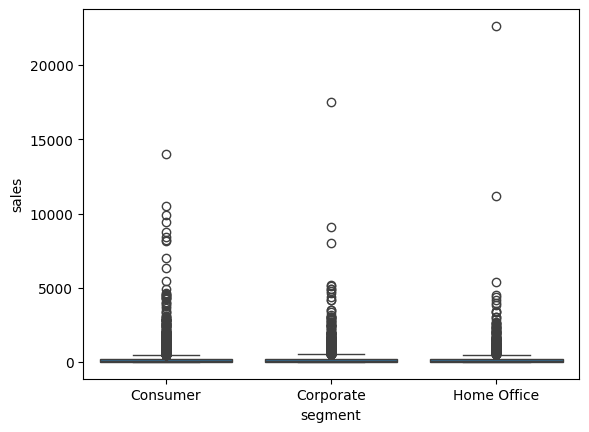

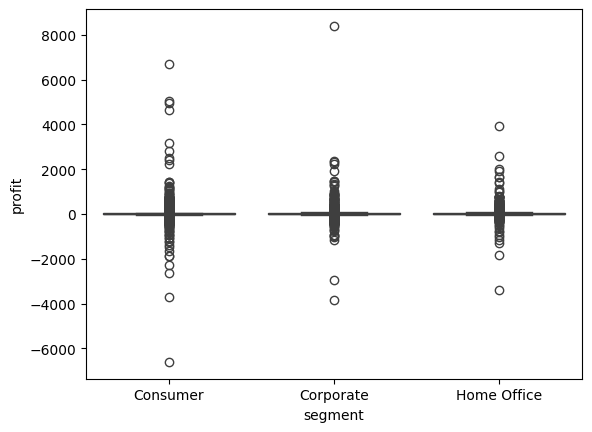

In [25]:
# Проверка на выбросы
sns.boxplot(df[['segment' ,'sales']], y='sales', x='segment')
plt.show()

sns.boxplot(df[['segment' ,'profit']], y='profit', x='segment')
plt.show()

Т.к. в данных имеются выбросы используем тест Крускала-Уоллеса для определения наличия статистически значимой разницы между медианами трех групп.

#### Средний чек

In [26]:
sales_consumer = df.query("segment == 'Consumer'")['sales']
sales_corporate = df.query("segment == 'Corporate'")['sales']
sales_home_office = df.query("segment == 'Home Office'")['sales']

H0(нулевая гипотеза): Медиана одинакова для всех групп.

H1(альтернативная гипотеза): Медиана не одинакова для всех групп.

In [27]:
st.kruskal(sales_consumer, sales_corporate, sales_home_office)

KruskalResult(statistic=0.684129907830567, pvalue=0.7103020663105177)

- Выводы  

Поскольку p-value(0.71) больше уровня значимости 0,05, мы не можем отвергнуть нулевую гипотезу о том, что средний уровень продаж одинаков для всех групп. У нас есть достаточно оснований утверждать что тип клиента не влияет на объем продаж.

#### Средняя прибыль

In [28]:
profit_consumer = df.query("segment == 'Consumer'")['profit']
profit_corporate = df.query("segment == 'Corporate'")['profit']
profit_home_office = df.query("segment == 'Home Office'")['profit']

H0(нулевая гипотеза): Медиана одинакова для всех групп.

H1(альтернативная гипотеза): Медиана не одинакова для всех групп.

In [29]:
st.kruskal(profit_consumer, profit_corporate, profit_home_office)

KruskalResult(statistic=4.372953664040231, pvalue=0.1123117455341331)

- Выводы  

Поскольку p-value(0.11) больше уровня значимости 0,05, мы не можем отвергнуть нулевую гипотезу о том, что средний уровень прибыли одинаков для всех групп. У нас есть достаточно оснований утверждать что тип клиента не влияет на уровень прибыли.

### Анализ суммы продаж и прибыли в разрезе региона\штата


Сумма продаж

In [30]:
df.groupby(['state', 'region'], as_index=False).agg({'sales': 'sum'}).sort_values('sales', ascending=False).head(10)


,state,region,sales
3,California,West,457687.6315
30,New York,East,310876.2710
41,Texas,Central,170188.0458
45,Washington,West,138641.2700
36,Pennsylvania,East,116511.9140
8,Florida,South,89473.7080
11,Illinois,Central,80166.1010
33,Ohio,East,78258.1360
20,Michigan,Central,76269.6140
44,Virginia,South,70636.7200


Визуализируем отдельно каждый регион

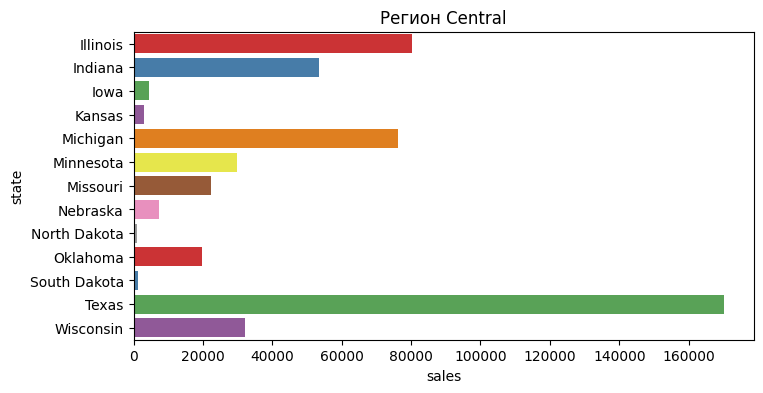

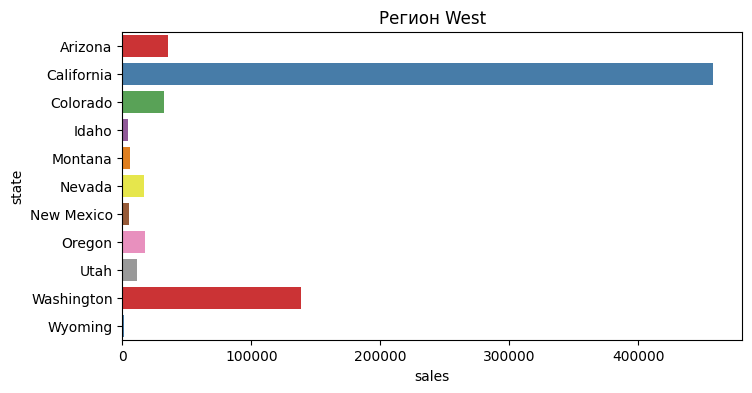

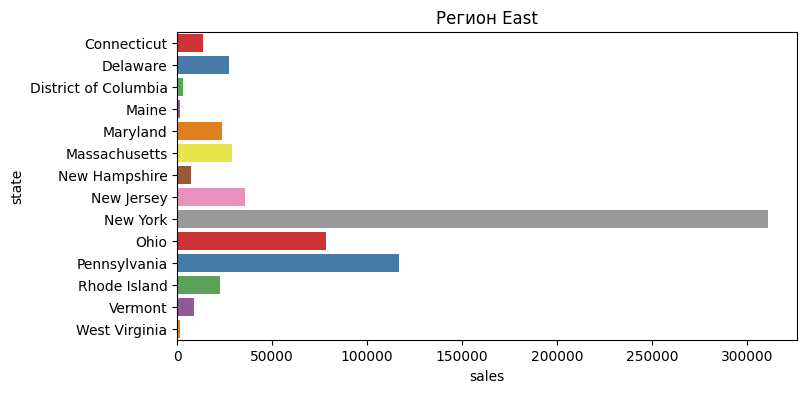

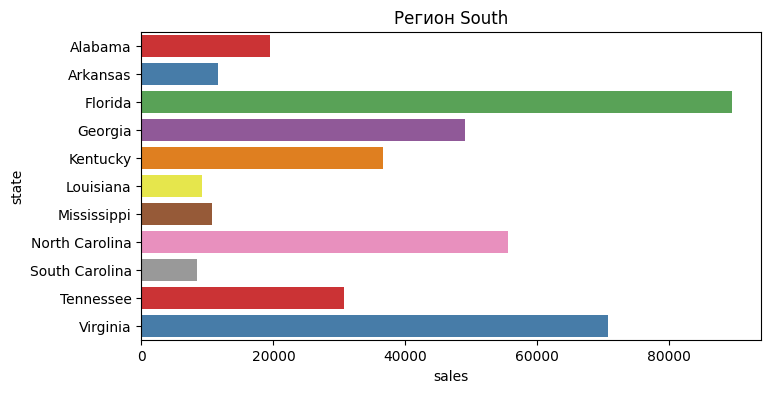

In [53]:
plt.figure(figsize=(8,4))
sns.barplot(df.query("region == 'Central'").groupby('state', as_index=False)\
            .agg({'sales': 'sum'}), x='sales', y='state',\
            palette='Set1')
plt.title('Регион Central')
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(df.query("region == 'West'").groupby('state', as_index=False)\
            .agg({'sales': 'sum'}), x='sales', y='state',\
            palette='Set1')
plt.title('Регион West')
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(df.query("region == 'East'").groupby('state', as_index=False)\
            .agg({'sales': 'sum'}), x='sales', y='state',\
            palette='Set1')
plt.title('Регион East')
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(df.query("region == 'South'").groupby('state', as_index=False)\
            .agg({'sales': 'sum'}), x='sales', y='state',\
            palette='Set1')
plt.title('Регион South')
plt.show()

Прибыль

In [32]:
df.groupby(['state', 'region'], as_index=False).agg({'profit': 'sum'}).sort_values('profit', ascending=False).head(10)

,state,region,profit
3,California,West,76381.3871
30,New York,East,74038.5486
45,Washington,West,33402.6517
20,Michigan,Central,24463.1876
44,Virginia,South,18597.9504
12,Indiana,Central,18382.9363
9,Georgia,South,16250.0433
15,Kentucky,South,11199.6966
21,Minnesota,Central,10823.1874
6,Delaware,East,9977.3748


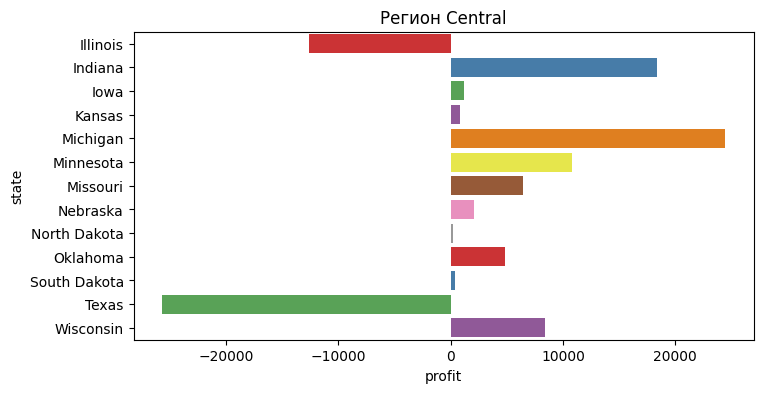

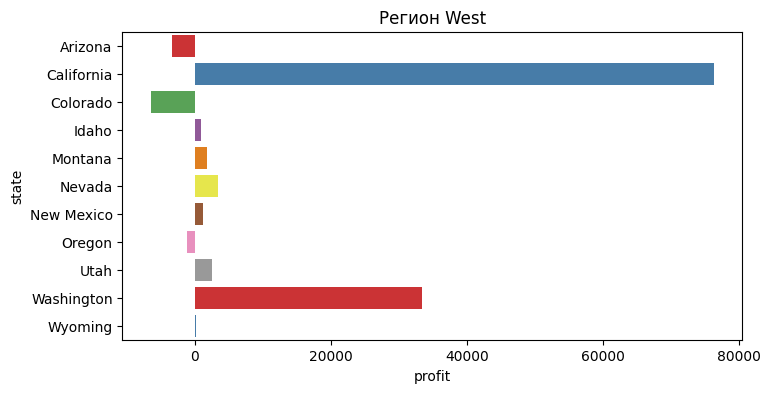

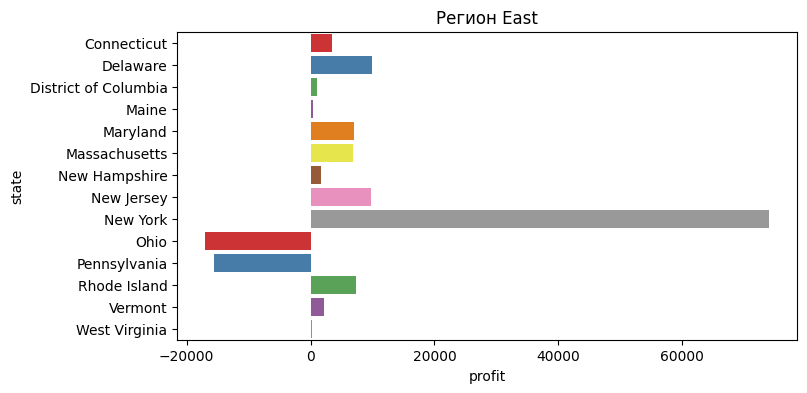

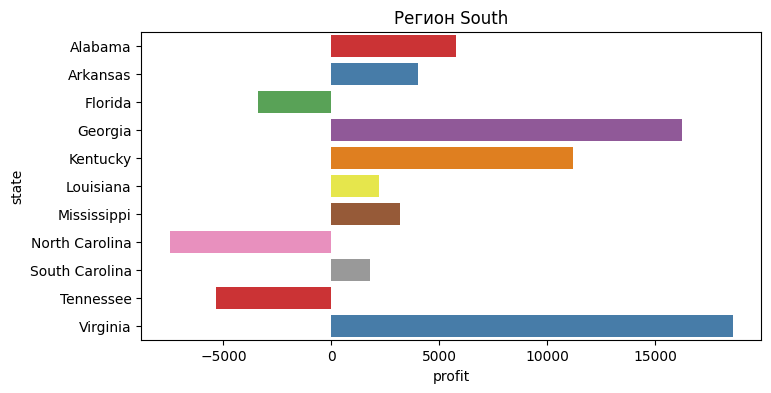

In [54]:
plt.figure(figsize=(8,4))
sns.barplot(df.query("region == 'Central'").groupby('state', as_index=False)\
            .agg({'profit': 'sum'}), x='profit', y='state',\
            palette='Set1')
plt.title('Регион Central')
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(df.query("region == 'West'").groupby('state', as_index=False)\
            .agg({'profit': 'sum'}), x='profit', y='state',\
            palette='Set1')
plt.title('Регион West')
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(df.query("region == 'East'").groupby('state', as_index=False)\
            .agg({'profit': 'sum'}), x='profit', y='state',\
            palette='Set1')
plt.title('Регион East')
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(df.query("region == 'South'").groupby('state', as_index=False)\
            .agg({'profit': 'sum'}), x='profit', y='state',\
            palette='Set1')
plt.title('Регион South')
plt.show()

### Анализ суммы продаж и прибыли в разрезе категорий товаров

In [56]:
df.sample()

,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,ship_time,order_year_month
4059,CA-2012-124058,2012-11-20,2012-11-24,Standard Class,LC-16885,Consumer,Oakland,California,West,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,572.16,3,0.2,35.76,96.0,2012-11


Самые продаваемые категории товаров

In [61]:
df.groupby('category', as_index=False).agg({'sales': 'sum'}).sort_values('sales', ascending=False)

,category,sales
2,Technology,836154.0330
0,Furniture,741999.7953
1,Office Supplies,719047.0320


Самый продаваемые подкатегории товаров

In [60]:
df.groupby('sub_category', as_index=False).agg({'sales': 'sum'}).sort_values('sales', ascending=False).head(10)

,sub_category,sales
13,Phones,330007.0540
5,Chairs,328449.1030
14,Storage,223843.6080
16,Tables,206965.5320
3,Binders,203412.7330
11,Machines,189238.6310
0,Accessories,167380.3180
6,Copiers,149528.0300
4,Bookcases,114879.9963
1,Appliances,107532.1610


Самые прибыльные подкатегории товаров

In [62]:
df.groupby('sub_category', as_index=False).agg({'profit': 'sum'}).sort_values('profit', ascending=False).head(10)

,sub_category,profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


### Теплова карта корреляции

<Axes: >

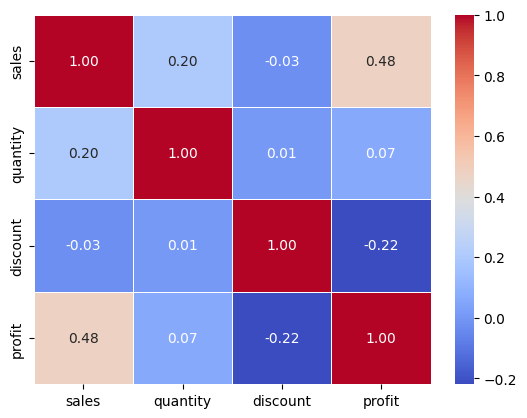

In [55]:
sns.heatmap(df[['sales', 'quantity', 'discount', 'profit']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

- Значительная положительная корреляция наблюдается между суммой заказа и уровнем прибыли, что вполне логично.

### Работа с выбросами

#### Выбросы sales

Используем метод межквартильного размаха (IQR, Interquartile Range) для определения порога за пределами которого будем считать значения выбросами. (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

In [34]:
Q1 = df.sales.quantile(q=.25)
Q3 = df.sales.quantile(q=.75)
IQR = st.iqr(df.sales)
print(Q1, Q3, IQR)

17.28 209.94 192.66


In [35]:
cond1 = df.sales > Q1 - 1.5 * IQR
cond2 = df.sales < Q3 + 1.5 * IQR

In [36]:
df_clean = df[cond1 & cond2]

In [37]:
df_clean.shape

(8827, 19)

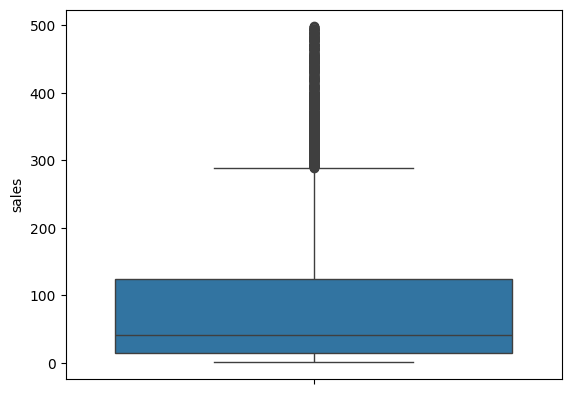

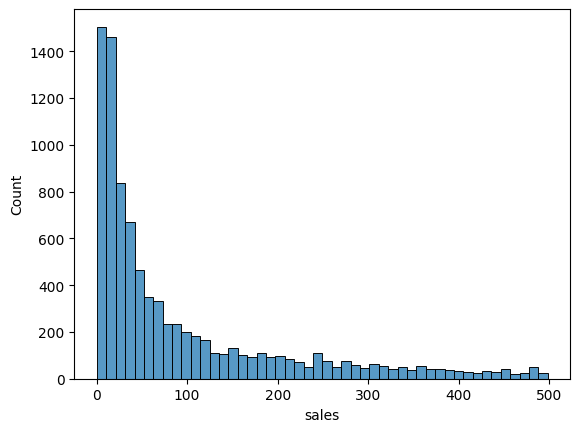

In [38]:
sns.boxplot(df_clean.sales)
plt.show()

sns.histplot(df_clean.sales)
plt.show()

#### Выбросы profit

Метод межквартильного размаха (IQR, Interquartile Range) для определения выбросов

In [39]:
Q1 = df.profit.quantile(q=.25)
Q3 = df.profit.quantile(q=.75)
IQR = st.iqr(df.profit)
print(Q1, Q3, IQR)

1.72875 29.364 27.63525


In [40]:
cond1 = df_clean.profit > Q1 - 1.5 * IQR
cond2 = df_clean.profit < Q3 + 1.5 * IQR

In [41]:
df_clean = df_clean[cond1 & cond2]

In [42]:
df_clean.shape

(7874, 19)

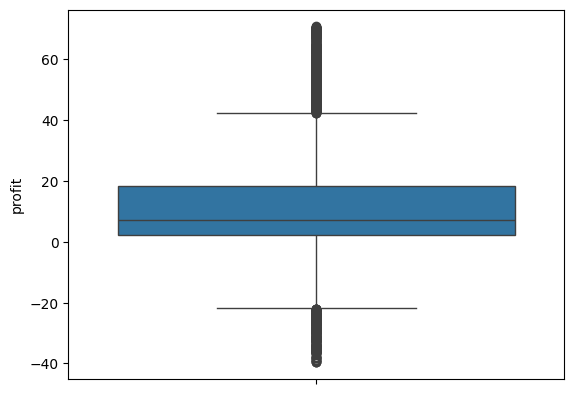

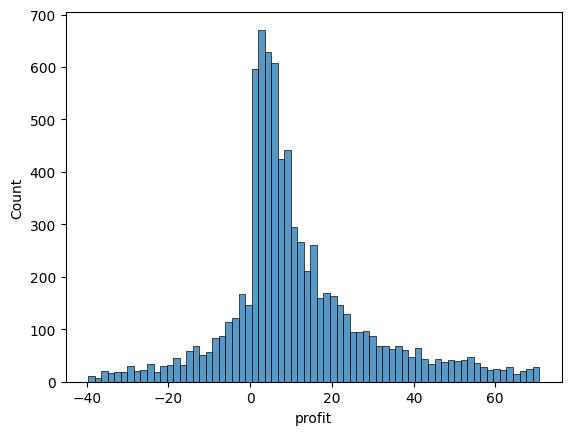

In [43]:
sns.boxplot(df_clean.profit)
plt.show()

sns.histplot(df_clean.profit)
plt.show()

### Прогнозирование суммы заказов с помошью линейной регрессии - NOT READY

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [65]:
df_clean.sample()

,order_id,order_date,ship_date,ship_mode,customer_id,segment,city,state,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,ship_time,order_year_month
9010,CA-2014-127803,2014-05-20,2014-05-24,Standard Class,ND-18460,Corporate,Huntsville,Alabama,South,OFF-BI-10001787,Office Supplies,Binders,Wilson Jones Four-Pocket Poly Binders,26.16,4,0.0,12.8184,96.0,2014-05


In [66]:
df_clean = df_clean[['sales', 'quantity', 'profit']]

In [67]:
X = df_clean.drop('sales', axis=1)
y = df_clean['sales']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
model = LinearRegression()

In [70]:
model.fit(X_train, y_train)

LinearRegression()

In [71]:
y_pred = model.predict(X_test)

In [72]:
y_pred

array([ 58.70938259,  57.43573287, 115.64090318, ...,  50.98949746,
        95.23095686,  62.42801476])